In [134]:
import requests
year = 2022
day = 18

url = f"https://adventofcode.com/{year}/day/{day}/input"

with open('cookie.txt', 'r') as file:
    session = file.read()

headers = {'cookie': f"session={session}"}

with open(f'day_{day}_input.txt', 'wb') as file:
    file.write(requests.get(url, headers=headers).content)
    
import os
if os.path.exists(f"day_{day}_test.txt"):
    test = [x.strip() for x in open(f'day_{day}_test.txt', 'r')]
    for line in test[:10]:
        print(line.strip())
print("---")
if os.path.exists(f"day_{day}_test_2.txt"):
    test_2 = [x.strip() for x in open(f'day_{day}_test_2.txt', 'r')]
    for line in test[:10]:
        print(line.strip())
print("---")
lines = [x.strip() for x in open(f'day_{day}_input.txt', 'r')]
for line in lines[:10]:
    print(line.strip())

2,2,2
1,2,2
3,2,2
2,1,2
2,3,2
2,2,1
2,2,3
2,2,4
2,2,6
1,2,5
---
---
19,15,11
9,5,7
11,3,16
16,8,4
16,17,8
2,7,12
2,7,7
16,17,7
5,13,3
8,19,11


In [127]:
from pprint import pprint

run_test = True

if run_test:
    case = test.copy()
    case.append("2,2,5")
else:
    case = lines
    
C = list()

for line in case:
    cube = [int(x) for x in line.split(',')]
    C.append(cube)
    
def get_faces_from_points(points):
    faces = []
        
    for d in range(3):
        for x in set([p[d] for p in points]):
            face = list(([p for p in points if p[d] == x]))
            face.sort(key=lambda k: (k[0], k[1], k[2]), reverse=True)
            face = tuple(face)
            faces.append(face)
    
    faces.sort(key=lambda k: (k[0], k[1], k[2]), reverse=True)
    faces=tuple(faces)
    return faces        

def get_possible_cube(face, cube_faces):
    
    for i in range(3):
        if len(set([point[i] for point in face])) == 1:
            plane = i
            break
    
    up_cube_points = list(face)
    for p in face:
        np = []
        for dim in range(3):
            n = p[dim]
            if dim == plane:
                n +=1
            np.append(n)
        up_cube_points.append(tuple(np))
    
    up_cube_points.sort(key=lambda k: (k[0], k[1], k[2]), reverse=True)
    
    down_cube_points = list(face)
    for p in face:
        np = []
        for dim in range(3):
            n = p[dim]
            if dim == plane:
                n -=1
            np.append(n)
        down_cube_points.append(tuple(np))
    down_cube_points.sort(key=lambda k: (k[0], k[1], k[2]), reverse=True)

    
    up_cube_faces = get_faces_from_points(up_cube_points)

    down_cube_faces = get_faces_from_points(down_cube_points)


    if cube_faces == up_cube_faces:
        down_cube_faces = list(down_cube_faces)
        down_cube_faces.remove(face)
        down_cube_faeces = tuple(down_cube_faces)
        return down_cube_faces
    if cube_faces == down_cube_faces:
        up_cube_faces = list(up_cube_faces)
        up_cube_faces.remove(face)
        up_cube_faces = tuple(up_cube_faces)
        return up_cube_faces
    assert False

    
    
all_faces_p1 = []
all_faces_p2 = []
interior_faces = []

p2_set = set()
int_set = set()

CF = []
for c, cube in enumerate(C):

    points = []
    for d in ((0,0,0),(0,0,1),(0,1,0),(0,1,1),(1,0,0),(1,0,1),(1,1,0),(1,1,1)):
        points.append((cube[0]+d[0],cube[1]+d[1],cube[2]+d[2]))
    
    faces = get_faces_from_points(points)
    CF.append(faces)


for c, faces in enumerate(CF):
    
    for face in faces:
        if face in all_faces_p1:
            all_faces_p1.remove(face)
        else:
            all_faces_p1.append(face)

    
    
#     for face in faces:
#         if face in p2_set:
#             int_set.add(face)
#         else:
#             blocking_cube = get_possible_cube(face, faces)
#             if all(x in p2_set for x in blocking_cube):
#                 print(f'closed by {C[c]}')
#                 int_set.add(face)
#                 int_set.update(blocking_cube)
    
#     p2_set.update(faces)
    
    
    for face in faces:
        if face in all_faces_p2:
            interior_faces.append(face)
        else:
            blocking_cube = get_possible_cube(face, faces)
            if all(x in all_faces_p2 for x in blocking_cube):
                #print(f'closed by {C[c]}')
                interior_faces.append(face)
                interior_faces.extend(blocking_cube)
    
    all_faces_p2.extend(faces)

    
    
#     for f, face in enumerate(faces):
#         if face in all_faces_p2:
#             #all_faces_p2.remove(face)
#             if face in interior_faces:
#                 pass
#             else:
#                 interior_faces.append(face)
#         else:
#             blocking_cube = get_possible_cube(face, faces)
#             #print(blocking_cube in CF)
#             #print(blocking_cube)
#             #pprint(bc)
#             #pprint(faces)
#             #print(bc==faces)
#             #print(all_faces_p2)
#             #assert False
            

#             if all(x in all_faces_p2 for x in blocking_cube):
#                 # TODO: can't be filling in actual void.
#                 interior_faces.append(face)
#                 interior_faces = interior_faces + list(blocking_cube)
#             #else:
#             all_faces_p2.append(face)
                
#            if c == 12:
#                print(f'there {len(all_faces_p2)}')



#    print(f"len after {c, C[c]}: {len(set(all_faces_p2)) - len(set(interior_faces))} {len(set(all_faces_p2))}, {len(set(interior_faces))}")
#    print(f"len after {c, C[c]}: {len(p2_set) - len(int_set)} {len(p2_set)}, {len(int_set)}")
print(f"len after {c, C[c]}: {len(set(all_faces_p2)) - len(set(interior_faces))} {len(set(all_faces_p2))}, {len(set(interior_faces))}")

# 3725 too high
# 3778 too high
# 3608 too high
# 3047

len after (13, [2, 2, 5]): 58 71, 13


In [87]:
for i in range(3,4):
    print(i)

3


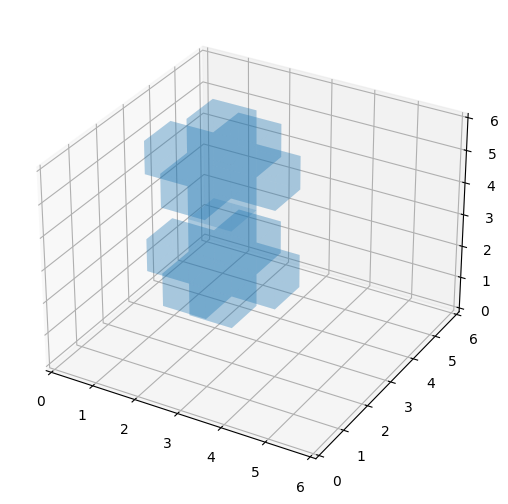

In [130]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
ax.axes.set_xlim3d(left=0, right=6) 
ax.axes.set_ylim3d(bottom=0, top=6) 
ax.axes.set_zlim3d(bottom=0, top=6) 
fig.add_axes(ax)
x = [0,1,1,0]
#face = ((2, 4, 6), (2, 4, 5), (2, 3, 6), (2, 3, 5))
verts = [(face[0],face[1],face[3],face[2]) for face in set(all_faces_p2)]
poly = Poly3DCollection(verts)
poly.set_alpha(0.2)
ax.add_collection3d(poly)


# verts2 = [(face[0],face[1],face[3],face[2]) for face in set(interior_faces)]
# poly2 = Poly3DCollection(verts2)
# poly2.set_alpha(1.0)
# poly2.set_facecolor('red')
# ax.add_collection3d(poly2)

plt.show()


In [83]:
#print(all_faces_p2)
print([max(x[i] for x in all_faces_p2) for i in range(3)])

[(22, 13, 12), (22, 13, 11), (22, 12, 12)]


In [299]:
!pip install fill_voids

In [301]:
import numpy

file = open('day_18_input.txt', 'r')
data = file.read()

file.close()

size = 25
cubes = numpy.zeros((size, size, size))

for line in data.splitlines():
    x, y, z = list(map(int, line.split(',')))
    cubes[x][y][z] = 1

edges = 0

def test_cube(x, y, z):
    edges = 0

    if cubes[x][y][z]:
        if not cubes[x - 1][y][z]:
            edges += 1

        if not cubes[x + 1][y][z]:
            edges += 1

        if not cubes[x][y - 1][z]:
            edges += 1

        if not cubes[x][y + 1][z]:
            edges += 1

        if not cubes[x][y][z - 1]:
            edges += 1

        if not cubes[x][y][z + 1]:
            edges += 1

    return edges

edges = 0

for x in range(-1, size):
    for y in range(-1, size):
        for z in range(-1, size):
            edges += test_cube(x, y, z)

print(edges)

import fill_voids

fill_voids.fill(cubes, in_place=True)

edges = 0

for x in range(-1, size):
    for y in range(-1, size):
        for z in range(-1, size):
            edges += test_cube(x, y, z)

edges

4418


2486

10


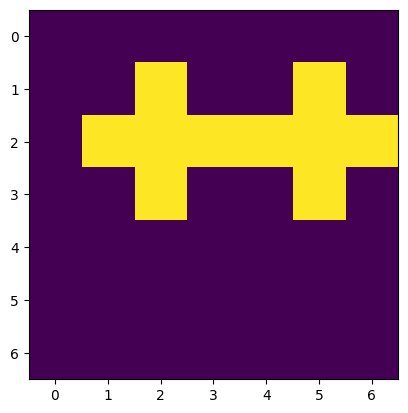

10


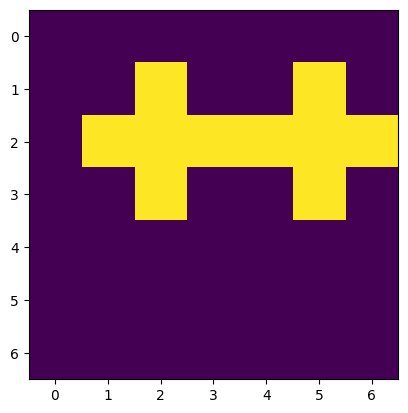

10


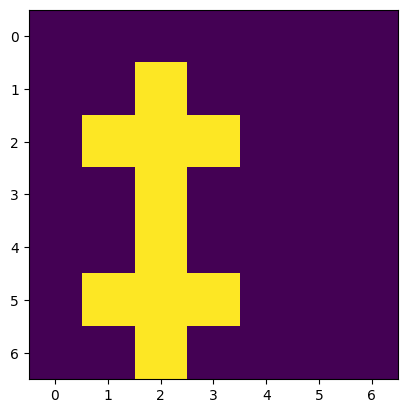

10


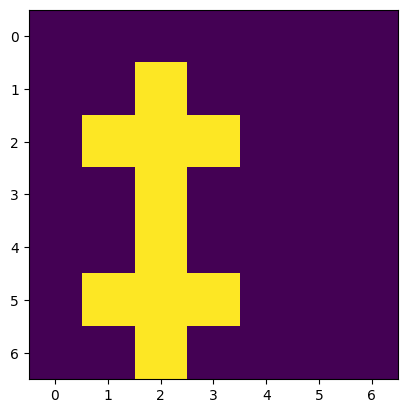

5


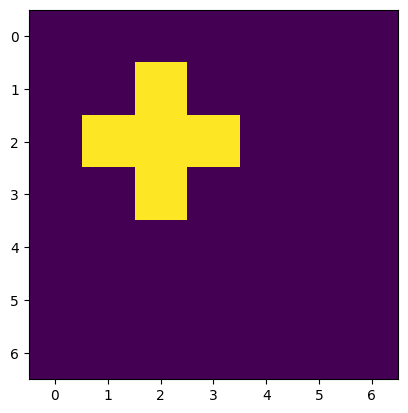

5


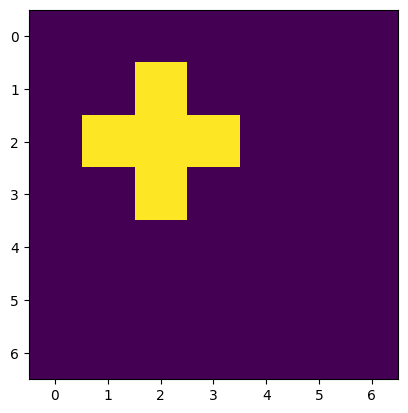

In [125]:
from pprint import pprint
import numpy as np

run_test = True

if run_test:
    case = test.copy()
    #case.append("2,2,5")
else:
    case = lines
    
C = list()

min_x = 10 
max_x = -1
min_y = 10
max_y = -1
min_z = 10
max_z = -1

for line in case:
    cube = [int(x) for x in line.split(',')]

    if cube[0] < min_x:
        min_x = cube[0]
    if cube[0] > max_x:
        max_x = cube[0]
    if cube[1] < min_y:
        min_y = cube[1]
    if cube[1] > max_y:
        max_y = cube[1]
    if cube[2] < min_z:
        min_z = cube[2]
    if cube[2] > max_z:
        max_z = cube[2]
        
        
    C.append(cube)
    

import matplotlib.pyplot as plt

if run_test:
    DIM = 7
else:
    DIM = 25

for d in range(3):
    filled_from_bottom = np.zeros(shape=(DIM,DIM),dtype=bool)
    for w in range(DIM):
        cubes_in_w = []
        for c, cube in enumerate(C):
            if cube[d] == w:
                cubes_in_z.append(cube)

        blocks_in_z = np.zeros(shape=(DIM,DIM))
        
        for cube in cubes_in_z:
            blocks_in_z[cube[(d+1)%3]][cube[(d+2)%3]] = 1
            filled_from_bottom[cube[(d+1)%3]][cube[(d+2)%3]] = True

    print(len(np.where(filled_from_bottom == True)[0]))
    plt.imshow(filled_from_bottom)
    plt.show()
    
    
    filled_from_top = np.zeros(shape=(DIM,DIM),dtype=bool)
    for w in reversed(range(DIM)):
        cubes_in_w = []
        for c, cube in enumerate(C):
            if cube[d] == w:
                cubes_in_z.append(cube)

        blocks_in_z = np.zeros(shape=(DIM,DIM))
        
        for cube in cubes_in_z:
            blocks_in_z[cube[(d+1)%3]][cube[(d+2)%3]] = 1
            filled_from_top[cube[(d+1)%3]][cube[(d+2)%3]] = True

    print(len(np.where(filled_from_top == True)[0]))
    plt.imshow(filled_from_top)
    plt.show()
    

In [138]:
from pprint import pprint
import numpy as np

run_test = True

if run_test:
    case = test
    #case.append("2,2,5")
else:
    case = lines
    
C = list()

min_x = 10 
max_x = -1
min_y = 10
max_y = -1
min_z = 10
max_z = -1

for line in case:       
    cube = [int(x) for x in line.split(',')]
    C.append(cube)
    

import matplotlib.pyplot as plt

if run_test:
    DIM = 7
else:
    DIM = 25

print(C)

obsidian = np.zeros(shape=(DIM,DIM,DIM))
for cube in C:
    print(cube)
    obsidian[cube[0],cube[1],cube[2]] = 1
    
print(obsidian)
assert False
    

for d in range(3):
    filled_from_bottom = np.zeros(shape=(DIM,DIM),dtype=bool)
    for w in range(DIM):
        cubes_in_w = []
        for c, cube in enumerate(C):
            if cube[d] == w:
                cubes_in_z.append(cube)

        blocks_in_z = np.zeros(shape=(DIM,DIM))
        
        for cube in cubes_in_z:
            blocks_in_z[cube[(d+1)%3]][cube[(d+2)%3]] = 1
            filled_from_bottom[cube[(d+1)%3]][cube[(d+2)%3]] = True

    print(len(np.where(filled_from_bottom == True)[0]))
    plt.imshow(filled_from_bottom)
    plt.show()
    
    
    filled_from_top = np.zeros(shape=(DIM,DIM),dtype=bool)
    for w in reversed(range(DIM)):
        cubes_in_w = []
        for c, cube in enumerate(C):
            if cube[d] == w:
                cubes_in_z.append(cube)

        blocks_in_z = np.zeros(shape=(DIM,DIM))
        
        for cube in cubes_in_z:
            blocks_in_z[cube[(d+1)%3]][cube[(d+2)%3]] = 1
            filled_from_top[cube[(d+1)%3]][cube[(d+2)%3]] = True

    print(len(np.where(filled_from_top == True)[0]))
    plt.imshow(filled_from_top)
    plt.show()
    

[[2, 2, 2], [1, 2, 2], [3, 2, 2], [2, 1, 2], [2, 3, 2], [2, 2, 1], [2, 2, 3], [2, 2, 4], [2, 2, 6], [1, 2, 5], [3, 2, 5], [2, 1, 5], [2, 3, 5]]
[2, 2, 2]
[1, 2, 2]
[3, 2, 2]
[2, 1, 2]
[2, 3, 2]
[2, 2, 1]
[2, 2, 3]
[2, 2, 4]
[2, 2, 6]
[1, 2, 5]
[3, 2, 5]
[2, 1, 5]
[2, 3, 5]
[[[0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 1. 0.]
  [0. 1. 1. 1. 1. 0. 1.]
  [0. 0. 1. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 

AssertionError: 